# <center> http://bit.ly/nusamandiri-18072021

<center><img alt="" src="images/cover_nusamandiri_18072021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2020</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

<center><img alt="" src="images/bio_TS.png" /></center>

# <center><font color="blue">Outline Workshop</font></center>

* Pengenalan, Outline, & Prasyarat
* **Pendahuluan & Baseline** Clustering: k-means
* **Kelemahan Baseline** sebagai pengembangan riset dasar: studi kasus k-means++ dan k-medoid
* Pengembangan riset bagi yang menyukai **pemrograman**: studi kasus mini-batch k-means.
* Bahkan di Statistika k-means memiliki **kekurangan** besar: studi kasus **Gower** similarity.
* Kita bisa riset di DS dengan mempertimbangkan **interpretability**: studi kasus Hierarchical clustering.
* Riset untuk yang suka **eksperimen numerik**: CoD, Fine-grained, Non-Convex.
* Suatu Algoritma/Model di DS (terutama clustering) biasanya untuk **aplikasi khusus** tertentu: studi kasus DBSCAN. 
* Perlahan ke arah Big Data (**Variety**), clustering pada data tidak terstruktur: studi kasus LDA
* **Variety bertemu Volume**: Studi kasus Word Embedding di Deep Learning.
* Riset yang terinspirasi dari **kebutuhan dunia nyata**: studi kasus semi-supervised LDA
* **Efficiency VS scalability** di riset Big Data, apa fokus risetnya?
* **Velocity**: Incremental/Online learning algorithm, bagaimana cara risetnya?
* **Hadoop dan Spark** bukan/belum menjadi "obat dewa" Big Data: studi kasus FCAR
* **Arah riset lain**: Memory usage, cost-benefit analysis big data, dll.

# <center><font color="blue">Asumsi Workshop Level Pasca Sarjana</font></center>

* Dasar Python, Matematika, & Data Science
* Fokus ke dunia akademis (Riset ~ bukan industri)
* Fokus ke konsep/filosofi (why?)
* Fokus ke *unsupervised Learning*, namun "filosofi"/konsep-nya dapat diterapkan ke supervised, reinforcement, atau self-supervised learning. 

# Pertanyaan yang ingin dijawab via Workshop ini:
## <font color="blue">" *Setelah menentukan topik apa yang harus saya lakukan?* "

<img src="images/clustering_research_mindmap_taudataID.png" style="height: 400px" />

In [ ]:
# install library yang dibutuhkan untuk workshop ini
# Gunakan Python 3.6 ... jangan 3.7 atau 3.8
!pip install --upgrade umap-learn
!pip install scikit-learn-extra
!pip install guidedlda

<img src="images/clustering_Quotes.png" />

# <font color="blue">Definisi

## Clustering is as a process of finding group structures within data such that each instance within a group is similar to one another and dissimilar to instances in other groups [1]

<img src="images/clusters_objective.jpg" style="height: 400px"/>


### [1]. Jain, A.K., Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 2010. 31(8): p. 651-666.

## <font color="blue">Aplikasi

Secara umum ada dua: 
1. Clustering untuk *utility* (e.g. kompresi data dan indexing di DB/search engine) 
2. Clustering untuk mengerti/analisa/memahami data (e.g., menemukan pola/insight) 

* Aplikasi di Data Mining dan Data Science biasanya yang ke-2.
* Clustering masuk ke EDA, ia bukan metode inferensia (tidak untuk digeneralisasi)

[2]. Pang-Ning, T., M. Steinbach, and V. Kumar, Introduction to data mining. Vol. 74. 2006, Boston, MA, USA: Addison-Wesley Longman Publishing Co., Inc.

## Contoh beberapa <font color="blue">aplikasi di dunia nyata

* Rekomendasi (misal di marketplace)
* Market segmentation (misal di periklanan)
* Social network analysis (misal community detection)
* Search result grouping (Search Engine)
* Medical imaging (deteksi penyakit di image processing)
* Anomaly detection (misal di finance)

<img src='images/clus_applications.png' style="height: 300px"/>

# <font color="blue">Tidak ada Error di Clustering ... ???? .... 

<img src='images/5_what_is_clustering.png'  style="height: 300px"/>

### Tidak ada "Ground Truth" di Unsupervised Learning/Clustering. <br> Salah satu "Bias" terbesar adalah algoritma clustering yang kita pilih. 
* Keuntungan jika jadi topik riset di pasca sarjana

# Riset dimulai dari <font color="blue">Baseline

<img src='images/clus_mindMap-01.png'/>

# <font color="blue">Pendahuluan</font> k-Means

* Salah satu algoritma paling dasar clustering
* Penting untuk memahami cara kerjanya
* Fungsi Tujuan (Objective Function):

<img alt="" src="images/algoritma_kMeans_simplify.png"  style="height: 300px"/>

* Penjelasan Interaktif: https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/ 

# Implementasi di <font color="blue">Python

In [1]:
# Load contoh data
import warnings; warnings.simplefilter('ignore')
import seaborn as sns

df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
print(X.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn import cluster

k = 3
km = cluster.KMeans(n_clusters=k, init='random').fit(X)
C_km = km.predict(X) # Hasil clusteringnya
C_km # Apa makna 0, 1, 2 disini? Coba Run beberapa kali, mengapa begitu?

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

# Kelemahan Pertama: Hasil yang <font color="blue">tidak reliabel

## Studi Kasus pertama: k-Means++

<img src='images/clus_mindMap-02.png'  style="height: 300px"/>

# <font color="blue">k-Means++

* Original <em>k-means</em> memulai algoritmanya dengan mengacak centroid awal dan k-means tidak &quot;robust&quot; terhadap centroid awal ini (apa artinya?).
* <strong>k-Means akan menghasilkan hasil yang berbeda-beda jika di-run beberapa kali!....</strong>
* k-Means++ &quot;mengatasi&quot; hal ini:
* inisialisasi centroid tidak random, tapi dengan menghitung probabilitas terbaik bagi centroid awal.
* Keuntungan selain lebih robust, biasanya iterasi yang dibutuhkan jauh lebih sedikit ketimbang k-means biasa.
* Reference :&nbsp;<a href="http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf" target="_blank">http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf</a>

<img src="images/km_vs_kmpp.gif" />

### image Source: https://medium.com/@phil.busko/animation-of-k-means-clustering-31a484c30ba5

In [3]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++').fit(X)
C_kmpp = kmPP.predict(X)
C_km # Coba run beberapa kali ... Problem Solved!!!...

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

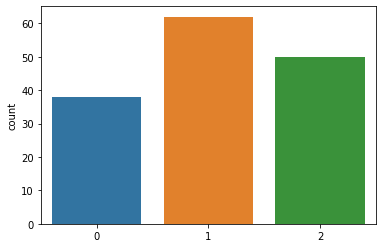

In [4]:
# Visualisasi 1 hasil k-Means++ (Bagaimana memahaminya?)
p= sns.countplot(C_km)

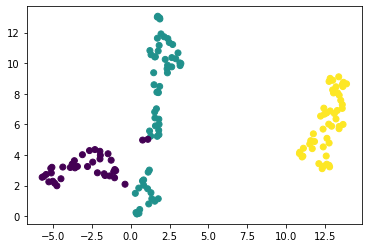

In [5]:
import umap, numpy as np, matplotlib.pyplot as plt

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=33).fit_transform(X)
# Apa X2D? Mengapa perlu? Boleh ganti algoritma lain?
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km) # Sebenarnya hanya baris ini utk membuat gambarnya
plt.show()

# Kelemahan Kedua: Hasil yang tidak <font color="blue">Robust

## Studi Kasus <font color="blue">K-Medoid

* Pentingnya memahami "konsep" statistika/matematika dasar.

<img src='images/kmeans-vs-kmedoids.png'  style="height: 300px"/>

* Sumber Gambar: https://www.researchgate.net/figure/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids_fig1_342871651

# Fenomena terkenal di " <font color="blue">How to Lie with Statistics "

<img src='images/mean_vs_median.png' style="height: 300px"/>

* Average menurut kamus Oxford: https://www.lexico.com/en/definition/average

## Dari Mean ke Median (Medoid)

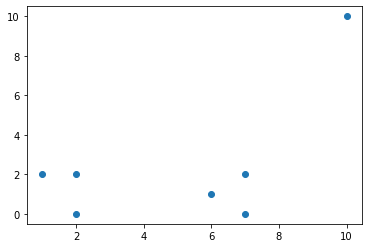

In [8]:
# Toy-data ==> ini perlu di riset
A = np.array([[2, 0], [1, 2], [2, 2], [7, 2], [6, 1], [7, 0], [10,10]])
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1])
plt.show()

In [9]:
# Solusi k-Means
km = cluster.KMeans(n_clusters=2, init='k-means++').fit(A)
C_km = km.predict(A)
centroid_km = km.cluster_centers_

# Solusi k-Medoid: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2).fit(A)
C_med = kmedoids.predict(A)
centroid_med = kmedoids.cluster_centers_
# Perhatikan Codingnya sangat sederhana (hanya 3 baris!!!), coding di penelitian DS jarang menjadi masalah utama.
# Google sebentar + baca kurang dari 10 menit, maka kita sudah bisa menerapkannya.
# Kalaupun ada error, warga Stackoverflow siap membantu.

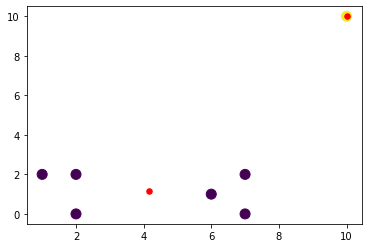

array([0, 0, 0, 0, 0, 0, 1])

In [10]:
# Plot Solusi k-Means
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_km, s=100) # s= size
ax.scatter(centroid_km[:,0], centroid_km[:,1], c="red", s=30) # Centroid k-Means "Red"
plt.show()
C_km

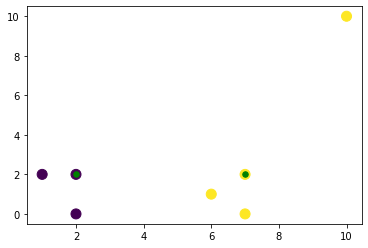

In [11]:
# Plot Solusi k-Medoid
fig, ax = plt.subplots()
ax.scatter(A[:,0], A[:,1], c=C_med, s=100)
ax.scatter(centroid_med[:,0], centroid_med[:,1], c="green", s=30) # Centroid k-Medoid "Green"
plt.show() 

# Di Contoh ini terlihat pentingnya Outlier detection!

# <font color="blue">Diskusi</font>: Apakah berarti k-Medoid lebih baik dari k-Means?

# Siapa yang tidak suka ngebut: <font color="blue">Performa</font> dalam algoritma DS/ML

## Studi Kasus <font color="blue">MiniBatch k-Means

<img src='images/clus_mindMap-03.png'/>

# Tantangan <font color="blue">Komputasi

* pahami Algoritmanya, ada nested Loop yang cukup dalam di k-Means.

<img alt="" src="images/clustering_efficiency.png" />

# Handling "<font color="blue">Large Data</font>" : Mini-Batch k-Means

<img alt="" src="images/5_minibatch.JPG" style="height: 300px" />

* <strong>Referensi</strong>: *Sculley, D. (2010, April). Web-scale k-means clustering. In&nbsp;<em>Proceedings of the 19th international conference on World wide web</em>&nbsp;(pp. 1177-1178). ACM. **Google**
* Termasuk pendekatan "sampling" untuk menangani data yang besar (**Volume**)
* Ingat ... Sampling dilakukan dengan menggunakan "pengacakan"/random .... Apa konsekuensinya?....

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


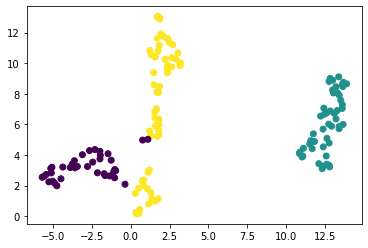

In [12]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=3, batch_size = 100, random_state = 33) 
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
print(C_mbkm)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

# Jiwa Data Science/Mining Terletak pada <font color="blue">"Insight"

### Studi Kasus <font color="blue">Hierarchical Clustering

<img src='images/clus_mindMap-04.png'/>

### Tips: Pahami keterbatasan "aplikasi" dari model/algoritma baseline.

# Hierarchical Clustering <font color="blue">Applications

<img alt="" src="images/5_Hierarchical_Text_Clustering_in_Genes_penyakit.jpg" style="height: 300px"/>

### image Source: https://www.sciencedirect.com/science/article/pii/S1532046416000307
    
## Kira-kira apa batasan dari metode yang terlalu fokus ke interpretability?

In [13]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='single', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

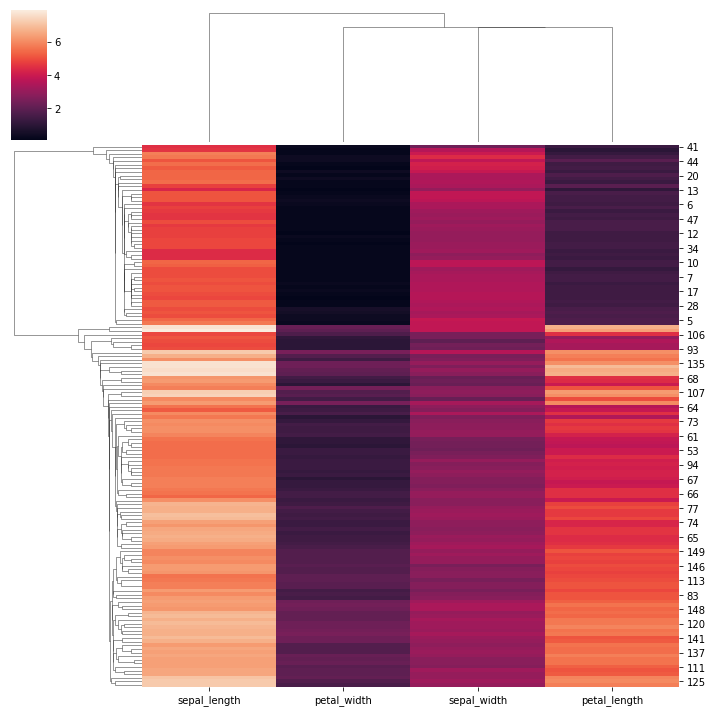

In [14]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="single", metric="euclidean")

# Contoh Penerapan di Penelitian

<img alt="" src="images/dendogram_radio_umum.png" />

# <font color="blue">Spectral Clustering

Spectral clustering bisa mengelompokkan data yang tidak &quot;spherical&quot; (bulat/Convex seperti k-means)

<img alt="" src="images/5_Spectral_kmeans.png" style="height:284px; width:671px" />

### Pahami Bias dari pemilihan algoritma dan konsekuensi pada studi perbandingan.

* Contoh yang pernah saya alami ketika menguji: Tree vs forest.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


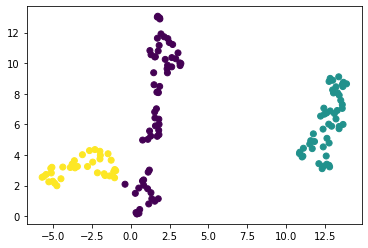

In [15]:
# Spectral : http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
spectral = cluster.SpectralClustering(n_clusters=3)
spectral.fit(X)
C_spec = spectral.labels_.astype(np.int)
print(C_spec)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_spec)
plt.show()

# Sprint ke Setengah Bagan

* Konsep, Konsep, Konsep, ...
* Detail lebih lanjut: https://tau-data.id/eda-03/ dan https://tau-data.id/eda-04/
<img src='images/clus_mindMap-05.png'/>

# Clustering yang sudah kita bahas diatas bahkan tidak bisa digunakan untuk data yang sederhana berikut (mengapa?)

<img src='images/Tbl_cat_num.png'/>

Solusi:
1. Dasar: one-hot/dummy encoding
2. Gower https://medium.com/@rumman1988/clustering-categorical-and-numerical-datatype-using-gower-distance-ab89b3aa90d9

# Fine-grained : Birch, FGCR

<img src='images/kmeanspp.png'  style="height: 300px"/>

* BIRCH https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html

# Curse of Dimensionality <font color="blue">(CoD)

<img src='images/Curse_of_dimensionality.png'  style="height: 400px"/>

## Sering terjadi di data tidak terstruktur

* Misal jumlah kolom VSM atau
* Jumlah neuron di Word Embedding
* Terjadi perubahan culture riset dari yang dominan analitik ke empiris (akibat Big Data).

# <font color="blue">Diskusi</font>: Bagaimana kita tau masalah-masalah ini?

# Emang iya?

<img src='images/toydata_contoh_cod.png'  style="height: 400px"/>


# <font color="blue">Solusi Analitik

<img src='images/hubs_vs_centroid_medoid.png'  style="height: 400px"/>
* Hubness: berapa kali suatu data point menjadi "tetangga" (k-NN) dari data lain di data.
* https://slideplayer.com/slide/3233739/

# <font color="blue">Solusi via Teknologi

<img src='images/IR-Data-Mining.png'  style="height: 400px"/>

# Dari mana <font color="blue">inspirasi/ide</font> risetnya?

# Hubs: Penelitian di sub-topik "representasi cluster"

<img src='images/Representasi_Cluster.PNG'  style="height: 400px"/>
* Sutanto, T., & Nayak, R. (2018). Fine-grained document clustering via ranking and its application to social media analytics. Social Network Analysis and Mining, 8(1), 1-19.

# Variety: Berbagai macam format data di era Data

<img src='images/variety.png'  style="height: 400px"/>

# Representasi Dokumen (sederhana): Vector Space Model

<img src='images/contoh_vsm.png'  style="height: 400px"/>

sumber gambar: https://cupdf.com/document/isp433633-week-3.html

## Resapi sebentar, jangan hanya fokus untuk mengerti, tapi apa makna dan konsekuensinya?

In [16]:
# Implementasi Python
from sklearn.feature_extraction.text import CountVectorizer

d1 = '@udin76, Minum kopi pagi-pagi sambil makan pisang goreng is the best'
d2 = 'Belajar NLP dan Text Mining ternyata seru banget sadiezz'
d3 = 'Aduh ga banget makan Mie Ayam p4k4i kesyap, please deh'
D = [d1,d2,d3]
tf_vectorizer = CountVectorizer(binary = False)
tf = tf_vectorizer.fit_transform(D)
print(tf.toarray())
print(tf_vectorizer.vocabulary_)

[[0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 2 1 0 0 1 0 0 0 1 1]
 [0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0]
 [1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0]]
{'udin76': 27, 'minum': 15, 'kopi': 11, 'pagi': 18, 'sambil': 22, 'makan': 12, 'pisang': 19, 'goreng': 8, 'is': 9, 'the': 26, 'best': 4, 'belajar': 3, 'nlp': 16, 'dan': 5, 'text': 25, 'mining': 14, 'ternyata': 24, 'seru': 23, 'banget': 2, 'sadiezz': 21, 'aduh': 0, 'ga': 7, 'mie': 13, 'ayam': 1, 'p4k4i': 17, 'kesyap': 10, 'please': 20, 'deh': 6}


# Data Tidak Terstruktur memiliki dimensi tambahan: perspektif/konteks

## Latent Dirichlet Allocation

<img alt="" src="images/4_Document_to_Topics.png" style="height: 300px" />

* Topic modelling lebih ke soft-clustering, dimana suatu dokumen dapat dimasukkan ke dalam beberapa cluster (topic) sekaligus. Adapun nama "topic/cluster"-nya di interpretasi dari kata-kata yang ada didalamnya.
* Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.

<img alt="" src="images/Probabilistic_Graph_Model.png" style="width: 800px; height: 565px;" />

<img alt="" src="images/LDA_Distributions.png" style="width: 800px; height: 623px;" />

## Melihat rumusnya memang pusing, tapi setidaknya ada satu-dua hal dasar yang bisa kita mengerti dan penting.

# Contoh implementasi: studi kasus 20NewsGroup (3 kategori)

<img alt="" src="images/6_20News.jpg" style="height: 300px ; width: 533px" />
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups" target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups</a></p>

<p><strong>Categories </strong>=&nbsp;</p>
<pre>
[&#39;alt.atheism&#39;, &#39;comp.graphics&#39;, &#39;comp.os.ms-windows.misc&#39;, &#39;comp.sys.ibm.pc.hardware&#39;, &#39;comp.sys.mac.hardware&#39;,
 &#39;comp.windows.x&#39;, &#39;misc.forsale&#39;, &#39;rec.autos&#39;, &#39;rec.motorcycles&#39;, &#39;rec.sport.baseball&#39;, &#39;rec.sport.hockey&#39;,
 &#39;sci.crypt&#39;, &#39;sci.electronics&#39;, &#39;sci.med&#39;, &#39;sci.space&#39;, &#39;soc.religion.christian&#39;, &#39;talk.politics.guns&#39;,
 &#39;talk.politics.mideast&#39;, &#39;talk.politics.misc&#39;, &#39;talk.religion.misc&#39;]</pre>

In [17]:
# Load Data terlebih dahulu
# Warning: Butuh koneksi internet jika belum pernah dijalankan
import pickle
from sklearn.datasets import fetch_20newsgroups

try: # Menghindari download dari internet berulang-ulang, cache di local storage
    f = open('data/News20_3Cats.pckl', 'rb')
    data = pickle.load(f)
    f.close()
except:
    categories = ['sci.med', 'talk.politics.misc',  'rec.autos']
    data = fetch_20newsgroups(categories=categories,remove=('headers', 'footers', 'quotes'))
    #data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
    f = open('data/News20_3Cats.pckl', 'wb')
    pickle.dump(data, f)
    f.close()
'Done'

'Done'

In [18]:
# Rubah struktur data diatas ke dalam bentuk struktur data sederhana: "list of documents"
Y = data.target # List: 0 = kategori 1, 1 = kategori 2, ... dst
print('Label Dokumen: ',set(Y))
X = [doc for doc in data.data] # setiap elemen dalam list adalah dokumen
# Tips menggunakan struktur data paling sederhana biasanya adalah keputusan yang baik.
X[:2] # Contoh 2 dokumen pertama

Label Dokumen:  {0, 1, 2}


['I want to get a car alarm and I am thinking about getting an Ungo Box.\n    Does anyone out there have any knowledge or experience with any of\n    these alarms?  How about price ranges for the different models?\n    Are these good car alarms?  Please email me any responces.\n\n                cak3@ns3.lehigh.edu',
 'I did hear this question asked during a radio news update of the case.  (They\nwere talking about the ongoing trial and had some audio clips).  Immediately\nafter the defense attorney asked the question, there was an "Objection!" heard\nin the background.  The clip ended at that point so I don\'t know if the\nobjection was upheld.  I can\'t imagine NC is *that* bad. \n\nThis I didn\'t hear as an audio clip but heard it reported a number of times on\nnews stories both during and after the trial.  Now the "we did it on purpose"\nthing is stretching, I think it was something more like--he had it coming.  If\nsomebody else remebers better than I on this second point, feel fr

In [19]:
# Bentuk VSM-nya
# mengapa TF dan bukan tf-idf?
tf_vectorizer = CountVectorizer(binary = False, lowercase=True, stop_words='english', max_df=0.75, min_df=5)
tf = tf_vectorizer.fit_transform(X)
tf_terms = tf_vectorizer.get_feature_names()
tf.shape

(1653, 4438)

# Kita eksperimen dulu jika menggunakan metode konvensional (k-means++)

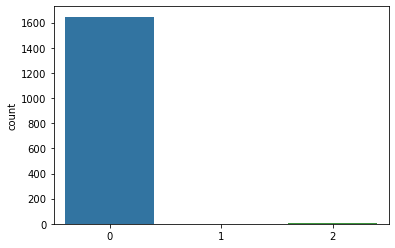

In [20]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++').fit(tf)
C_kmpp = kmPP.predict(tf)
p = sns.countplot(C_kmpp) # Apa makna hasil ini?

In [21]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
n_topics = 3
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=3, random_state=0)

In [22]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

(1653, 3)


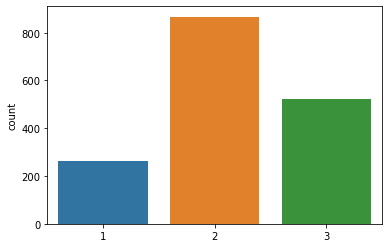

In [23]:
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)# Ukuran kolom = #Topics ==> Dimension Reduction
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in vsm_topics] # topic of docs
p=sns.countplot(doc_topic)

In [24]:
# Mari kita coba maknai masing-masing topic ini
Top_Words=7
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 3 Topics, with top 7 Words:
Topic #1:
president mr stephanopoulos edu com think health
Topic #2:
car like just don good time know
Topic #3:
people don government just think like make


# Tapi kelebihan utamanya bukan disini

In [25]:
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.125922 -0.061290       1        1  39.054982
0     -0.127580 -0.058931       2        1  30.958660
2      0.001658  0.120221       3        1  29.986358, topic_info=                Term        Freq       Total Category  logprob  loglift
3073       president  404.000000  404.000000  Default  30.0000  30.0000
3827  stephanopoulos  329.000000  329.000000  Default  29.0000  29.0000
2652              mr  424.000000  424.000000  Default  28.0000  28.0000
2917          people  771.000000  771.000000  Default  27.0000  27.0000
688              car  517.000000  517.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
4046          things   92.650794  205.098997   Topic3  -5.9749   0.4098
4425           years   97.270674  308.267093   Topic3  -5.9263   0.0510
4252              ve   97.976852  347.688489   Topic3  -5.9190  -0.0621
1290            does   92.978208  331.003812   Topic3  -5.9714  -0.0653
1807           going   91.075707  346.857088   Topic3  -5.9921  -0.1328

[253 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6         1  0.232818         10
6         2  0.649949         10
6         3  0.116409         10
50        2  0.966070       1991
50        3  0.021002       1991
...     ...       ...        ...
4425      1  0.330882      years
4425      2  0.353589      years
4425      3  0.314662      years
4426      1  0.978234      yeast
4429      2  0.993429  yesterday

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

# Semi-supervised: Saat kita memiliki pengetahuan tambahan

* Preferable di dunia nyata
* Meningkatkan kualitas topik
* https://github.com/vi3k6i5/GuidedLDA

In [46]:
def safeVectorizer(D, type_='tf', maxDf=0.95, minDf=2, ngram_=(1, 2), label=None):
    if type_=='tfidf':
        pass
    elif type_=='tf':
        vectorizer = CountVectorizer(binary = False, lowercase=True, stop_words='english', max_df=0.75, min_df=5)
        #ngram_range=ngram_, strip_accents='unicode', token_pattern=r'\b[a-zA-Z]{3,}\b', max_df=maxDf, min_df=minDf)
    elif type_=='binary':
        pass
    else:
        print("Type unsupported")
        return None
    
    newL = label
    while True:    
        X = vectorizer.fit_transform(D)
        if X[X.getnnz(1)>0].shape[0]==X.shape[0]:
            break
        else:
            if label:
                newD, newL = [], []
                nBaris, nKolom = X.shape
                for i,d in enumerate(D):
                    if sum(X[i].data)!=0:
                        newD.append(d)
                        newL.append(label[i])
                D = newD.copy()
                label = newL.copy()
            else:
                newD = []
                nBaris, nKolom = X.shape
                for i,d in enumerate(D):
                    if sum(X[i].data)!=0:
                        newD.append(d)
                D = newD
    if label:
        return X, vectorizer.get_feature_names(), newL
    else:
        return X, vectorizer.get_feature_names(), label

In [47]:
Dk, vocabK, dL = safeVectorizer(X, type_='tf', maxDf=0.75, minDf=5, ngram_=(1, 1), label=None)
word2id = dict((v, idx) for idx, v in enumerate(vocabK))

In [48]:
import guidedlda

seed_topic_list = ["car engine gasoline automotive".split(),
                   "government president politics people country".split(),
                   "health body medicine insurance doctor patient".split()]

iter_ = 3000
refresh_ = int(iter_/3)
model = guidedlda.GuidedLDA(n_topics=3, n_iter=iter_, random_state=42, refresh=refresh_, alpha=2.0, eta=0.01)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

model.fit(Dk.toarray(), seed_topics=seed_topics, seed_confidence=0.95)

INFO:guidedlda:n_documents: 1585
INFO:guidedlda:vocab_size: 4438
INFO:guidedlda:n_words: 121564
INFO:guidedlda:n_topics: 3
INFO:guidedlda:n_iter: 3000
INFO:guidedlda:<0> log likelihood: -1133271
INFO:guidedlda:<1000> log likelihood: -968231
INFO:guidedlda:<2000> log likelihood: -968116
INFO:guidedlda:<2999> log likelihood: -968372


In [49]:
topic_word = model.topic_word_
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabK)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: car edu like just com don good time
Topic 1: people think don mr know president going stephanopoulos
Topic 2: use health medical information 1993 10 years patients


# Bagian penting lain dari riset DS:
    
    * Optimal Parameter
    * Cross Validasi
    * Sensitivity analysis (jika mengusulkan algoritma/model baru)
    * Preprocessing yang tepat

# <font color="blue">Diskusi</font>: Bagaimana jika kita "lemah" dalam suatu aspek di riset kita?

* Misal mual jika lihat rumus atau lemes jika coding. :)

# Cost Analysis & "Green" Research on (Big) Data Science 01

<img src='images/ibm_trueNorth.png'  style="height: 600px"/>

# Cost Analysis Research on (Big) Data Science 01

<img src='images/Multi_Users.PNG'  style="height: 200px"/>

# Ide efisiensi dan scalability Clustering di Big Data

* Google, Bing, Yahoo search
* Elasticsearch, Solr, Sphinx, etc.
<img src='images/Top-6-Best-Search-Engines.png'  style="height: 300px"/>

# Pemikiran lain

<img src='images/clusters_ToI.png'  style="height: 600px"/>

# "Green" Research

<img src='images/arsitektur.PNG'  style="height: 600px"/>

# Wrap-up

<img src='images/clustering_research_mindmap_taudataID.png'  style="height: 600px"/>

# <center><font color="blue"> End of Module

<hr />
<p><img alt="" src="images/Meme-on-Machine-Learning-accuracy.jpg"  style="height: 400px"/></p>